# Cost of living index by country analysis

#### Task 1. Univariate Analysis (univariate EDA)

For numerical variables: evaluate descriptive statistics, distribution, presence of statistical outliers, and missing data (analyze the target variable separately)

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("C:/Andriy/.SPL/Lab7/Cost_of_Living_Index_by_Country_2024.csv", sep=";")
df['Rank Tier'] = pd.cut(
   df['Rank'],
   bins=[0, 20, 40, 60, 80, 100, 121], 
   labels=['1-19', '20-39', '40-59', '60-79', '80-99', '100+'],  
)

target=df["Local Purchasing Power Index"]
df.info()

print(df["Local Purchasing Power Index"].describe())
print("Kurtosis:\t", df["Local Purchasing Power Index"].kurtosis())
print("Skewness:\t", df["Local Purchasing Power Index"].skew())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Rank                            121 non-null    int64   
 1   Country                         121 non-null    object  
 2   Cost of Living Index            121 non-null    float64 
 3   Rent Index                      121 non-null    float64 
 4   Cost of Living Plus Rent Index  121 non-null    float64 
 5   Groceries Index                 121 non-null    float64 
 6   Restaurant Price Index          121 non-null    float64 
 7   Local Purchasing Power Index    121 non-null    float64 
 8   Rank Tier                       121 non-null    category
dtypes: category(1), float64(6), int64(1), object(1)
memory usage: 8.0+ KB
count    121.000000
mean      65.094215
std       39.569094
min        2.300000
25%       34.800000
50%       50.600000
75%       99.400000

#### Continent column creation

In [ ]:
country_to_continent = {
   'Albania': 'Europe',
   'Andorra': 'Europe',
   'Armenia': 'Europe',
   'Austria': 'Europe',
   'Azerbaijan': 'Europe',
   'Belarus': 'Europe',
   'Belgium': 'Europe',
   'Bosnia and Herzegovina': 'Europe',
   'Bulgaria': 'Europe',
   'Croatia': 'Europe',
   'Cyprus': 'Europe',
   'Czech Republic': 'Europe',
   'Denmark': 'Europe',
   'Estonia': 'Europe',
   'Finland': 'Europe',
   'France': 'Europe',
   'Georgia': 'Europe',
   'Germany': 'Europe',
   'Greece': 'Europe',
   'Hungary': 'Europe',
   'Iceland': 'Europe',
   'Ireland': 'Europe',
   'Italy': 'Europe',
   'Kazakhstan': 'Europe',
   'Kosovo': 'Europe',
   'Latvia': 'Europe',
   'Liechtenstein': 'Europe',
   'Lithuania': 'Europe',
   'Luxembourg': 'Europe',
   'Malta': 'Europe',
   'Moldova': 'Europe',
   'Monaco': 'Europe',
   'Montenegro': 'Europe',
   'Netherlands': 'Europe',
   'North Macedonia': 'Europe',
   'Norway': 'Europe',
   'Poland': 'Europe',
   'Portugal': 'Europe',
   'Romania': 'Europe',
   'Russia': 'Europe',
   'San Marino': 'Europe',
   'Serbia': 'Europe',
   'Slovakia': 'Europe',
   'Slovenia': 'Europe',
   'Spain': 'Europe',
   'Sweden': 'Europe',
   'Switzerland': 'Europe',
   'Turkey': 'Europe',
   'Ukraine': 'Europe',
   'United Kingdom': 'Europe',
   'Vatican City': 'Europe',

   'Afghanistan': 'Asia',
   'Armenia': 'Asia',
   'Azerbaijan': 'Asia',
   'Bahrain': 'Asia',
   'Bangladesh': 'Asia',
   'Bhutan': 'Asia',
   'Brunei': 'Asia',
   'Cambodia': 'Asia',
   'China': 'Asia',
   'Cyprus': 'Asia',
   'Georgia': 'Asia',
   'India': 'Asia',
   'Indonesia': 'Asia',
   'Iran': 'Asia',
   'Iraq': 'Asia',
   'Israel': 'Asia',
   'Japan': 'Asia',
   'Jordan': 'Asia',
   'Kazakhstan': 'Asia',
   'Kuwait': 'Asia',
   'Kyrgyzstan': 'Asia',
   'Laos': 'Asia',
   'Lebanon': 'Asia',
   'Malaysia': 'Asia',
   'Maldives': 'Asia',
   'Mongolia': 'Asia',
   'Myanmar (Burma)': 'Asia',
   'Nepal': 'Asia',
   'North Korea': 'Asia',
   'Oman': 'Asia',
   'Pakistan': 'Asia',
   'Palestine': 'Asia',
   'Philippines': 'Asia',
   'Qatar': 'Asia',
   'Saudi Arabia': 'Asia',
   'Singapore': 'Asia',
   'South Korea': 'Asia',
   'Sri Lanka': 'Asia',
   'Syria': 'Asia',
   'Tajikistan': 'Asia',
   'Thailand': 'Asia',
   'Timor-Leste': 'Asia',
   'Turkey': 'Asia',
   'Turkmenistan': 'Asia',
   'United Arab Emirates': 'Asia',
   'Uzbekistan': 'Asia',
   'Vietnam': 'Asia',
   'Yemen': 'Asia',

   'Algeria': 'Africa',
   'Angola': 'Africa',
   'Benin': 'Africa',
   'Botswana': 'Africa',
   'Burkina Faso': 'Africa',
   'Burundi': 'Africa',
   'Cabo Verde': 'Africa',
   'Cameroon': 'Africa',
   'Central African Republic': 'Africa',
   'Chad': 'Africa',
   'Comoros': 'Africa',
   'Congo (Congo-Brazzaville)': 'Africa',
   'Djibouti': 'Africa',
   'Egypt': 'Africa',
   'Equatorial Guinea': 'Africa',
   'Eritrea': 'Africa',
   'Eswatini (fmr. "Swaziland")': 'Africa',
   'Ethiopia': 'Africa',
   'Gabon': 'Africa',
   'Gambia': 'Africa',
   'Ghana': 'Africa',
   'Guinea': 'Africa',
   'Guinea-Bissau': 'Africa',
   'Ivory Coast': 'Africa',
   'Kenya': 'Africa',
   'Lesotho': 'Africa',
   'Liberia': 'Africa',
   'Libya': 'Africa',
   'Madagascar': 'Africa',
   'Malawi': 'Africa',
   'Mali': 'Africa',
   'Mauritania': 'Africa',
   'Mauritius': 'Africa',
   'Morocco': 'Africa',
   'Mozambique': 'Africa',
   'Namibia': 'Africa',
   'Niger': 'Africa',
   'Nigeria': 'Africa',
   'Rwanda': 'Africa',
   'Sao Tome and Principe': 'Africa',
   'Senegal': 'Africa',
   'Seychelles': 'Africa',
   'Sierra Leone': 'Africa',
   'Somalia': 'Africa',
   'South Africa': 'Africa',
   'South Sudan': 'Africa',
   'Sudan': 'Africa',
   'Tanzania': 'Africa',
   'Togo': 'Africa',
   'Tunisia': 'Africa',
   'Uganda': 'Africa',
   'Zambia': 'Africa',
   'Zimbabwe': 'Africa',

   'Australia': 'Oceania',
   'Fiji': 'Oceania',
   'Kiribati': 'Oceania',
   'Marshall Islands': 'Oceania',
   'Micronesia': 'Oceania',
   'Nauru': 'Oceania',
   'New Zealand': 'Oceania',
   'Palau': 'Oceania',
   'Papua New Guinea': 'Oceania',
   'Samoa': 'Oceania',
   'Solomon Islands': 'Oceania',
   'Tonga': 'Oceania',
   'Tuvalu': 'Oceania',
   'Vanuatu': 'Oceania',

   'Antigua and Barbuda': 'North America',
   'Bahamas': 'North America',
   'Barbados': 'North America',
   'Belize': 'North America',
   'Canada': 'North America',
   'Costa Rica': 'North America',
   'Cuba': 'North America',
   'Dominica': 'North America',
   'Dominican Republic': 'North America',
   'El Salvador': 'North America',
   'Grenada': 'North America',
   'Guatemala': 'North America',
   'Haiti': 'North America',
   'Honduras': 'North America',
   'Jamaica': 'North America',
   'Mexico': 'North America',
   'Nicaragua': 'North America',
   'Panama': 'North America',
   'Saint Kitts and Nevis': 'North America',
   'Saint Lucia': 'North America',
   'Saint Vincent and the Grenadines': 'North America',
   'Trinidad and Tobago': 'North America',
   'United States': 'North America',

   'Argentina': 'South America',
   'Bolivia': 'South America',
   'Brazil': 'South America',
   'Chile': 'South America',
   'Colombia': 'South America',
   'Ecuador': 'South America',
   'Guyana': 'South America',
   'Paraguay': 'South America',
   'Peru': 'South America',
   'Suriname': 'South America',
   'Uruguay': 'South America',
   'Venezuela': 'South America',

   'Antarctica': 'Antarctica',
}

df['Continent'] = df['Country'].map(country_to_continent).fillna('Unknown')

df.loc[df['Country'].isin(['Taiwan', 'Hong Kong (China)']), 'Continent'] = 'Asia'
df.loc[df['Country'].isin(["Puerto Rico","Trinidad And Tobago"]),'Continent'] = 'North America'
df.loc[df['Country'].isin(["Bosnia And Herzegovina", "Kosovo (Disputed Territory)"]), 'Continent'] = 'Europe'
df.head(10)

,Rank,Country,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index,Rank Tier,Continent
0,1,Switzerland,101.1,46.5,74.9,109.1,97.0,158.7,1-19,Europe
1,2,Bahamas,85.0,36.7,61.8,81.6,83.3,54.6,1-19,North America
2,3,Iceland,83.0,39.2,62.0,88.4,86.8,120.3,1-19,Europe
3,4,Singapore,76.7,67.2,72.1,74.6,50.4,111.1,1-19,Asia
4,5,Barbados,76.6,19.0,48.9,80.8,69.4,43.5,1-19,North America
5,6,Norway,76.0,26.2,52.1,79.0,73.5,114.7,1-19,Europe
6,7,Denmark,72.3,26.4,50.2,64.8,81.3,127.2,1-19,Europe
7,8,Hong Kong (China),70.8,59.4,65.3,84.6,46.2,109.3,1-19,Asia
8,9,United States,70.4,41.7,56.6,75.0,67.2,142.3,1-19,North America
9,10,Australia,70.2,33.4,52.5,77.3,62.5,127.4,1-19,Oceania


#### Local Purchasing Power Index - target variable.
Now analyzing all other continuous variables.

In [5]:
df_nont=df.drop(columns="Local Purchasing Power Index")
df_num=df.drop(columns=["Country","Rank Tier","Rank","Continent"])
df_cat=df_nont[["Country","Rank Tier"]]

display(df_num.describe())
print("Kurtosis:\n", df_num.kurtosis(),"\n")
print("Skewness:\n", df_num.skew())

,Cost of Living Index,Rent Index,Cost of Living Plus Rent Index,Groceries Index,Restaurant Price Index,Local Purchasing Power Index
count,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000
mean,43.555372,16.052893,30.357851,44.228926,36.471074,65.094215
std,16.147574,11.412267,13.263721,17.055109,18.258110,39.569094
min,18.800000,2.400000,11.100000,17.500000,12.800000,2.300000
25%,30.200000,8.500000,19.800000,31.600000,21.600000,34.800000
50%,39.500000,12.400000,27.000000,40.500000,33.100000,50.600000
75%,52.800000,20.100000,37.000000,53.700000,47.200000,99.400000
max,101.100000,67.200000,74.900000,109.100000,97.000000,182.500000


Kurtosis:
 Cost of Living Index              0.502256
Rent Index                        4.313270
Cost of Living Plus Rent Index    0.950773
Groceries Index                   1.150854
Restaurant Price Index            0.448567
Local Purchasing Power Index     -0.192628
dtype: float64 

Skewness:
 Cost of Living Index              0.892545
Rent Index                        1.871039
Cost of Living Plus Rent Index    1.104020
Groceries Index                   1.120842
Restaurant Price Index            0.948335
Local Purchasing Power Index      0.790071
dtype: float64


Since all variables are left-skewed, we will make them more symmetrical.


c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

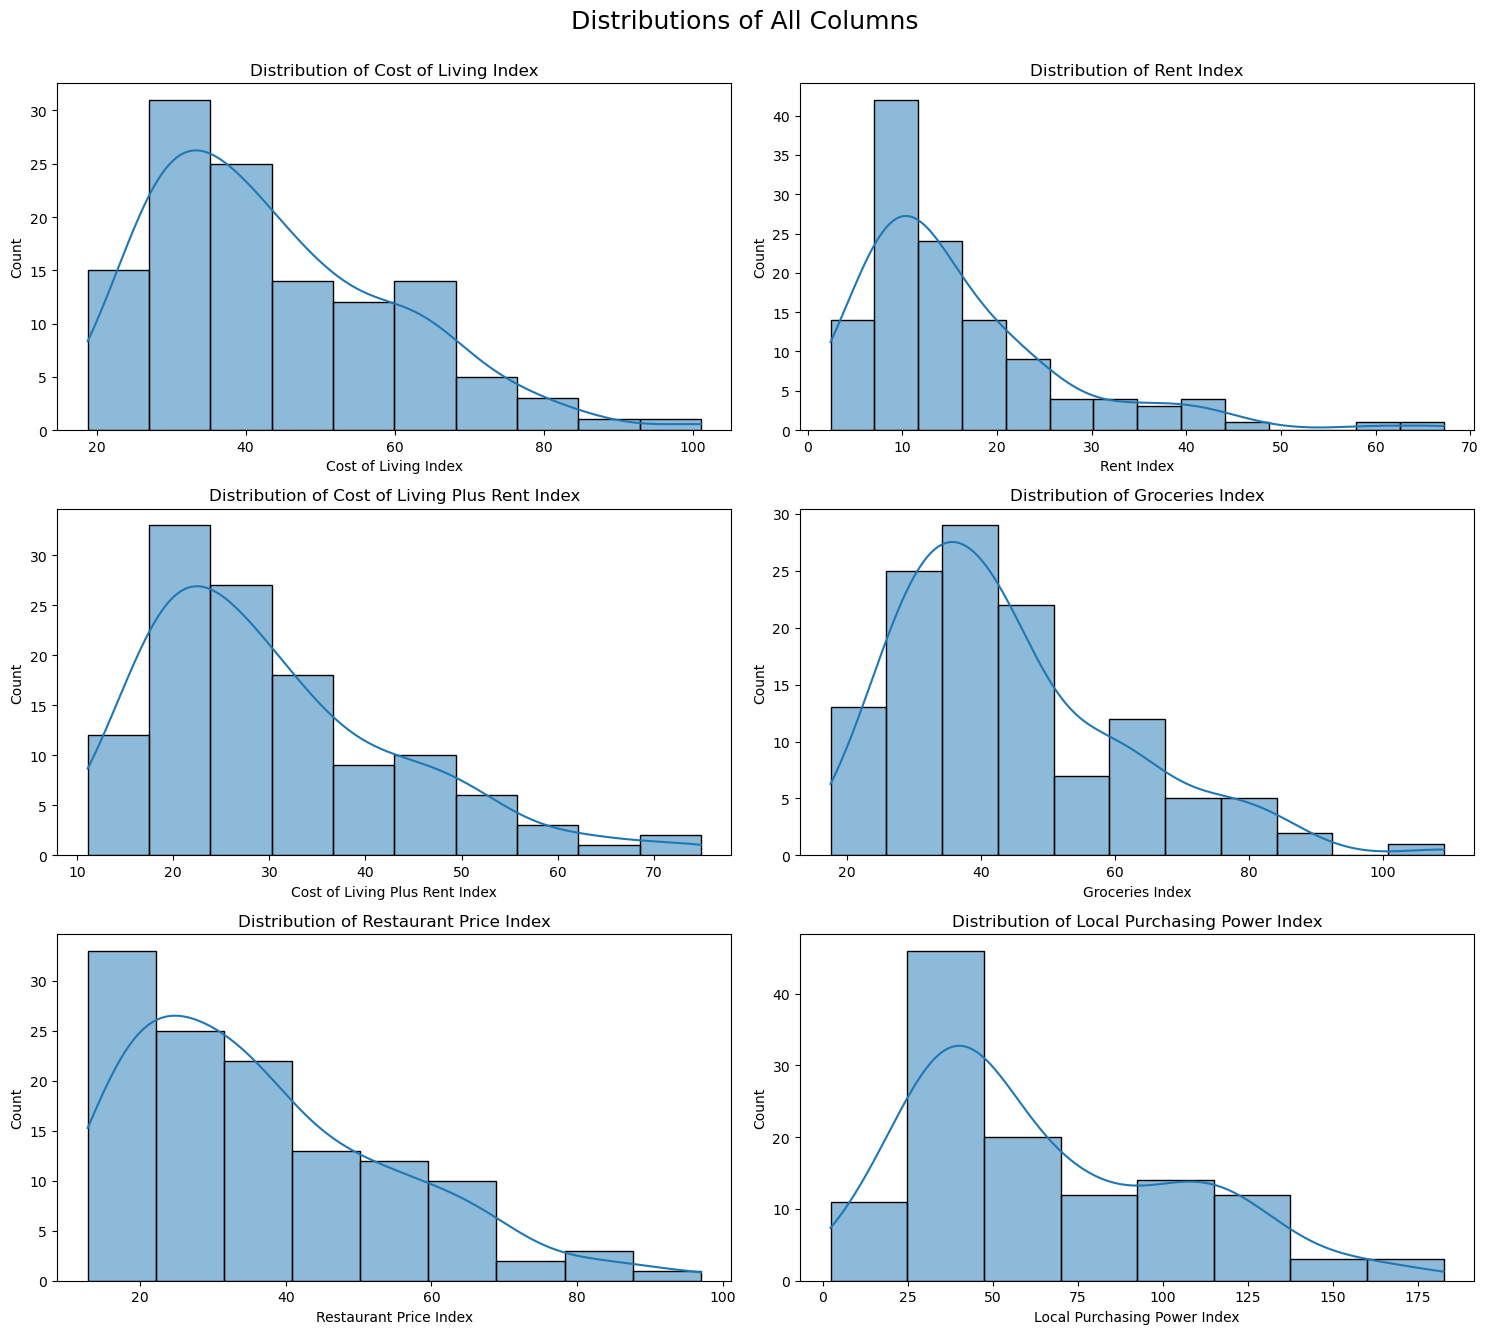

In [ ]:
df_num1 = df_num.replace([np.inf, -np.inf], np.nan)

columns = list(df_num1.columns) + ["Local Purchasing Power Index"]

f, axs = plt.subplots(3, 2, figsize=(15, 14))

for ax, col in zip(axs.flat, columns):
   sns.histplot(df[col], ax=ax, kde=True, fill=True)
   ax.set_title(f"Distribution of {col}")  

f.suptitle("Distributions of All Columns", fontsize=18, y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.show()

In [7]:
df_norm=np.log(df.drop(columns=["Country","Rank Tier","Rank","Continent"]))
df_norm["Local Purchasing Power Index"] = -np.square(df_norm["Local Purchasing Power Index"])
print("\n\nNormalized Skewness:\n", df_norm.skew())



Normalized Skewness:
 Cost of Living Index              0.166376
Rent Index                        0.057119
Cost of Living Plus Rent Index    0.226648
Groceries Index                   0.287061
Restaurant Price Index            0.062820
Local Purchasing Power Index      0.157398
dtype: float64


c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

Text(0.5, 0.95, 'Normalized distributions of All Columns')

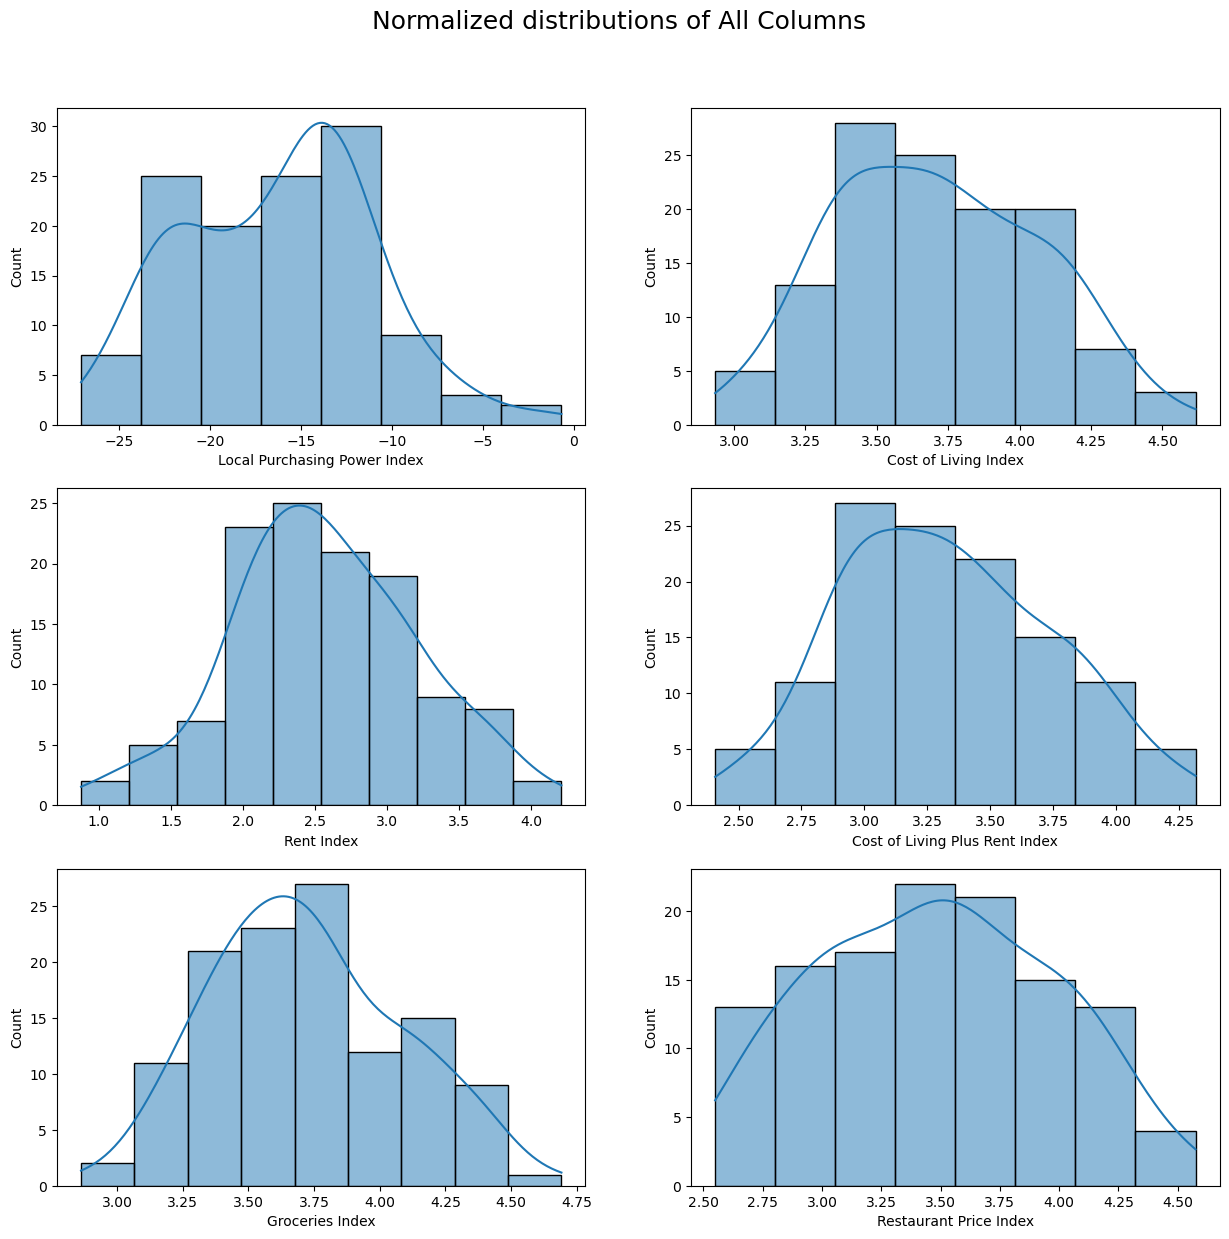

In [8]:
f, axs=plt.subplots(3,2, figsize=(15,14))
sns.histplot(df_norm["Cost of Living Index"], ax=axs[0,1], kde=True)
sns.histplot(df_norm["Rent Index"], ax=axs[1,0],kde=True)
sns.histplot(df_norm["Cost of Living Plus Rent Index"], ax=axs[1,1],kde=True)
sns.histplot(df_norm["Groceries Index"], ax=axs[2,0],kde=True)
sns.histplot(df_norm["Restaurant Price Index"], ax=axs[2,1],kde=True)
sns.histplot(df_norm["Local Purchasing Power Index"], ax=axs[0,0],kde=True)
f.suptitle("Normalized distributions of All Columns", fontsize=18, y=0.95)

After log transformation, most distributions became more symmetric, although they still do not appear normal.  Identifying outliers

In [9]:
import pandas as pd
outliers = {}
for column in df_num:
    Q1 = df_num[column].quantile(0.25)  
    Q3 = df_num[column].quantile(0.75) 
    IQR = Q3 - Q1 
    lower_bound = Q1 - 1.5 * IQR  
    upper_bound = Q3 + 1.5 * IQR 

    lower_outliers = df[df_num[column] < lower_bound][["Country", column]]
    upper_outliers = df[df_num[column] > upper_bound][["Country", column]]
    outliers[column] = pd.concat([lower_outliers, upper_outliers])

for column, values in outliers.items(): 
    print(f"Викиди для {column}:\n")
    if not values.empty:
        print(values.to_string(index=False), "\n")
    else:
        print("Відсутні\n")


Викиди для Cost of Living Index:

    Country  Cost of Living Index
Switzerland                 101.1 

Викиди для Rent Index:

             Country  Rent Index
         Switzerland        46.5
             Iceland        39.2
           Singapore        67.2
   Hong Kong (China)        59.4
       United States        41.7
             Ireland        42.3
          Luxembourg        40.5
United Arab Emirates        41.3 

Викиди для Cost of Living Plus Rent Index:

          Country  Cost of Living Plus Rent Index
      Switzerland                            74.9
        Singapore                            72.1
Hong Kong (China)                            65.3 

Викиди для Groceries Index:

    Country  Groceries Index
Switzerland            109.1
    Iceland             88.4 

Викиди для Restaurant Price Index:

    Country  Restaurant Price Index
Switzerland                    97.0
    Iceland                    86.8 

Викиди для Local Purchasing Power Index:

Відсутні



All outliers here are unique values that differ significantly from most data. For example, Switzerland has extreme values in almost all columns.

<Axes: >

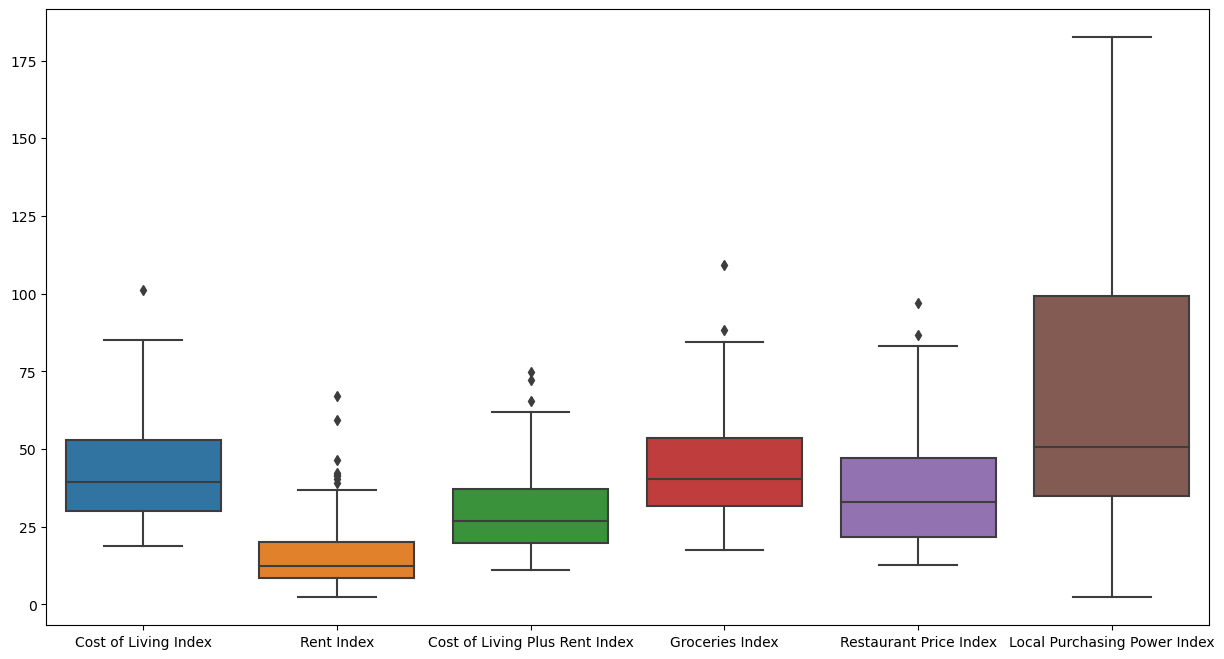

In [10]:
f, axs= plt.subplots(1,1, figsize=(15,8))
sns.boxplot(data=df_num)

In [11]:
print(df["Local Purchasing Power Index"].describe())
print("Kurtosis:\t", df["Local Purchasing Power Index"].kurtosis())
print("Skewness:\t", df["Local Purchasing Power Index"].skew())

count    121.000000
mean      65.094215
std       39.569094
min        2.300000
25%       34.800000
50%       50.600000
75%       99.400000
max      182.500000
Name: Local Purchasing Power Index, dtype: float64
Kurtosis:	 -0.19262844400618606
Skewness:	 0.7900710943840142


c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


[Text(0.5, 1.0, 'Squared distribution')]

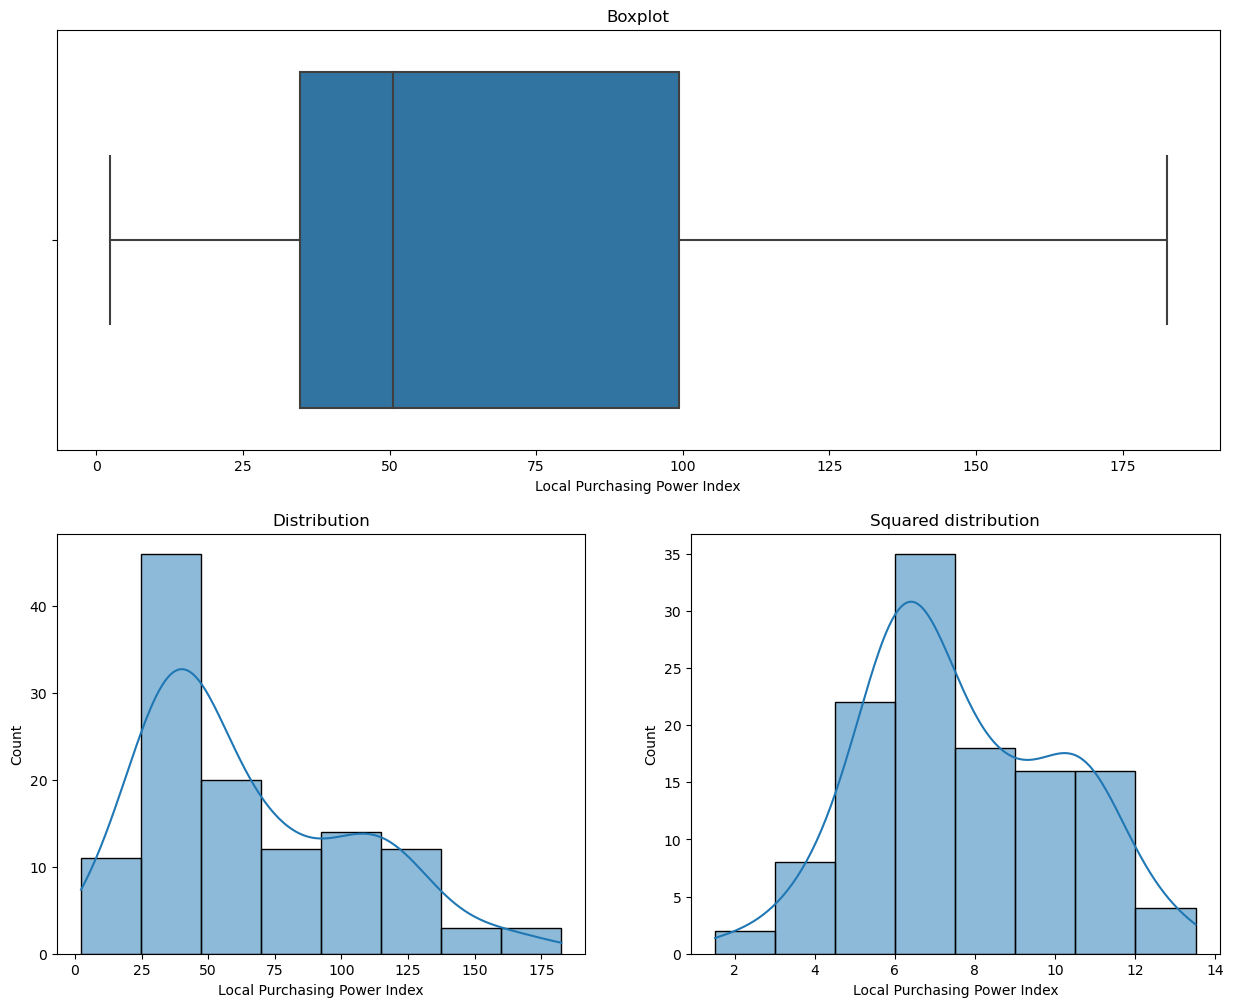

In [12]:
f,axs=plt.subplot_mosaic("AA\nBC" ,figsize=(15,12))
sns.boxplot(x=df["Local Purchasing Power Index"], ax=axs["A"])
sns.histplot(df["Local Purchasing Power Index"], kde=True, ax=axs["B"])
df_tnorm=np.sqrt(df["Local Purchasing Power Index"])
sns.histplot(df_tnorm, kde=True, ax=axs["C"])
axs["A"].set(title="Boxplot")
axs["B"].set(title="Distribution")
axs["C"].set(title="Squared distribution")

For categorical variables: evaluate the distribution and balance of categories, and check for missing data.

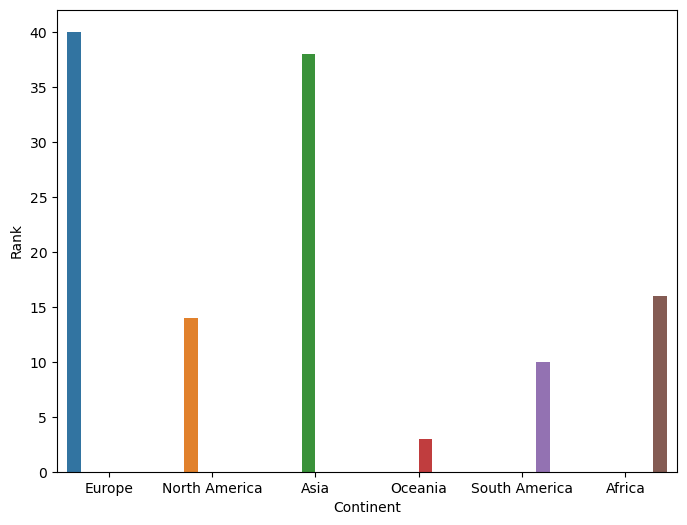

Country      0
Rank Tier    0
dtype: int64

In [13]:
f, axs = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(data=df, x="Continent", y="Rank", hue="Continent", estimator=len)
plt.legend().remove()
plt.show()
df_cat.isnull().sum()

#### Task 2. Bivariate/Multivariate Analysis

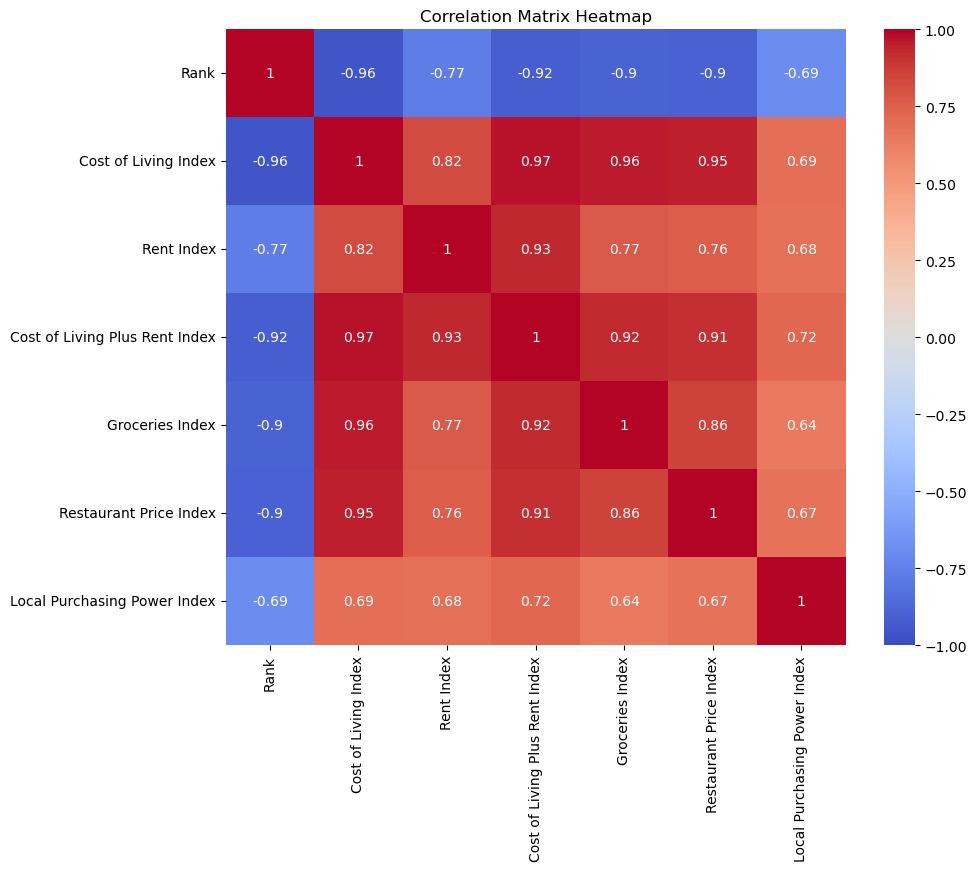

In [14]:
df_num = df.select_dtypes(include=['number'])
correlation_matrix = df_num.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix Heatmap")
plt.show()

Most variables have strong correlations (>80%), except for Local Purchasing Power Index and Rent Index with Groceries Index and Restaurant Price Index.

Rank has a negative correlation with all variables, which makes sense since the lower the rank, the higher the indices.

Local Purchasing Power Index has a lower correlation, meaning it is less dependent on other variables.

All other indices are highly correlated (>80%), indicating that locations with higher rent costs also tend to have higher living, grocery, and restaurant expenses.

#### Visual representation of highly correlated variable pairs.

c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

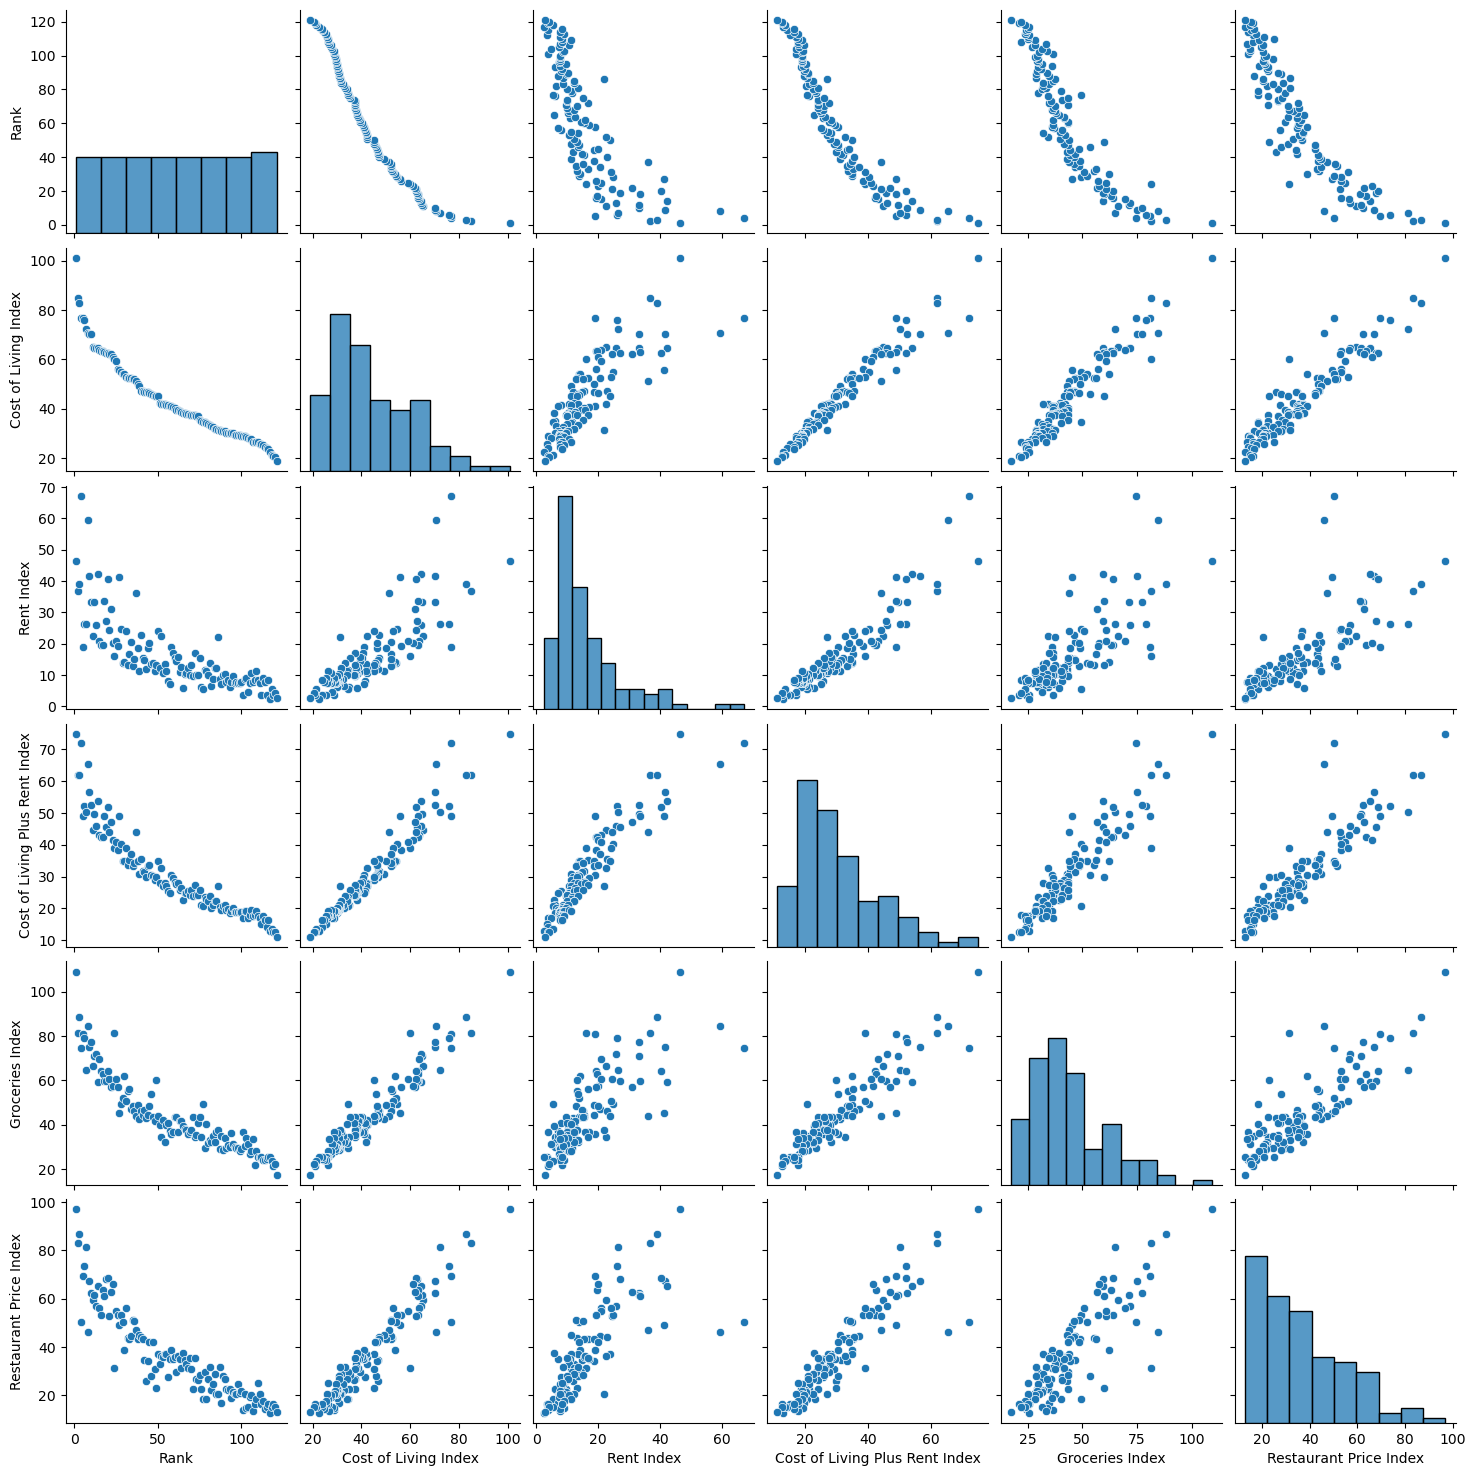

In [15]:
df_num_pp=df.drop(columns="Local Purchasing Power Index")
sns.pairplot(df_num_pp)

c:\Andriy\.PKR\Anaconda2\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\Андрій\AppData\Local\Temp\ipykernel_14140\4149353675.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x='Continent', y='Local Purchasing Power Index', data=df, palette='mako', ax=axes[1], estimator=np.mean, ci=False)


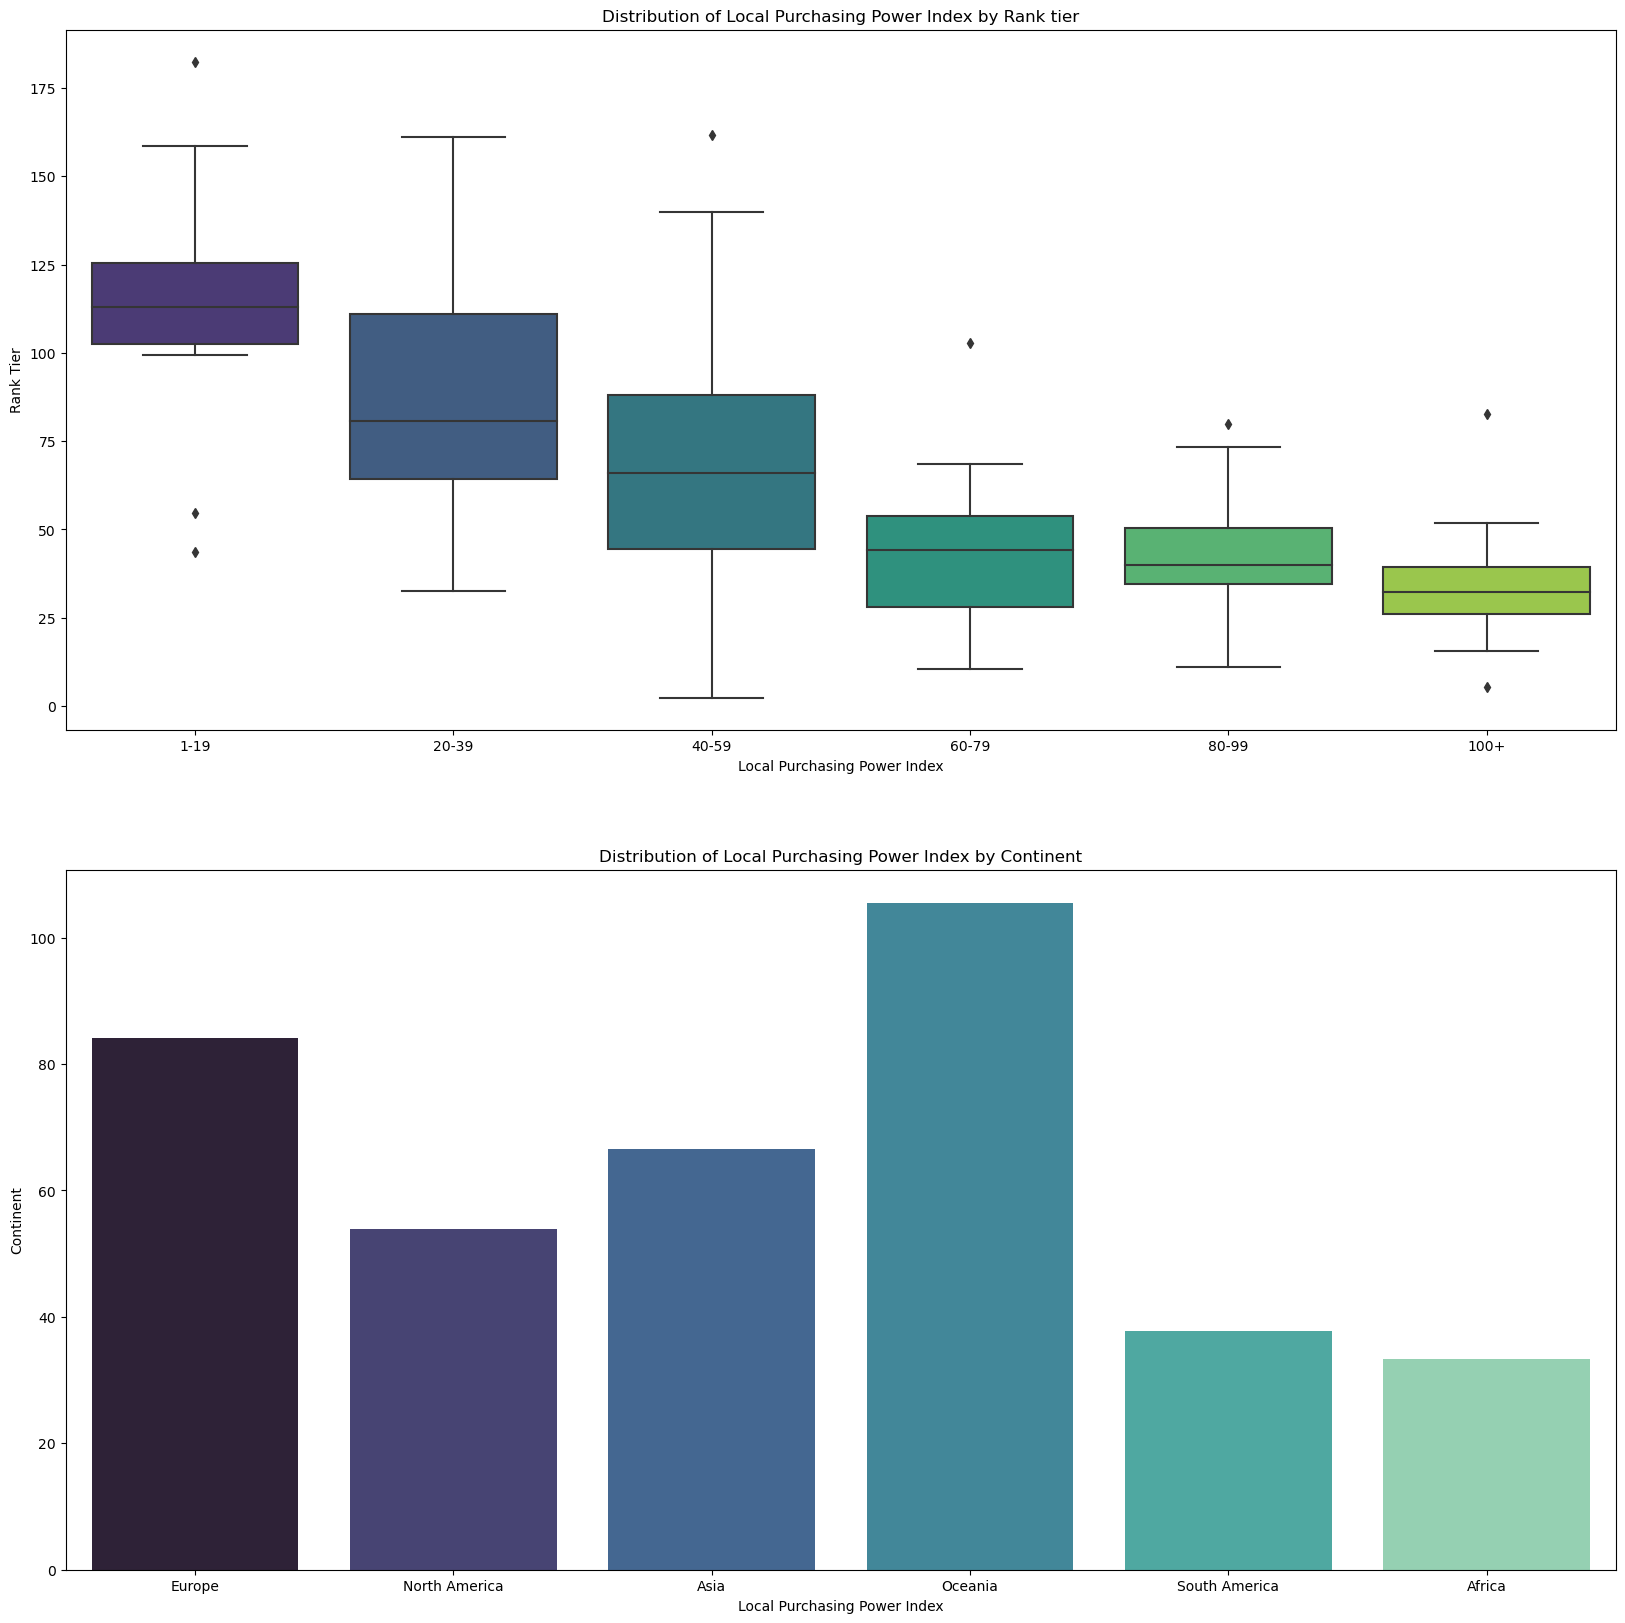

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(20, 20))

sns.boxplot(x='Rank Tier', y='Local Purchasing Power Index', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Distribution of Local Purchasing Power Index by Rank tier')
axes[0].set_xlabel('Local Purchasing Power Index')
axes[0].set_ylabel('Rank Tier')

sns.barplot(x='Continent', y='Local Purchasing Power Index', data=df, palette='mako', ax=axes[1], estimator=np.mean, ci=False)
axes[1].set_title('Distribution of Local Purchasing Power Index by Continent')
axes[1].set_xlabel('Local Purchasing Power Index')
axes[1].set_ylabel('Continent')
plt.show()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Rank                            121 non-null    int64   
 1   Country                         121 non-null    object  
 2   Cost of Living Index            121 non-null    float64 
 3   Rent Index                      121 non-null    float64 
 4   Cost of Living Plus Rent Index  121 non-null    float64 
 5   Groceries Index                 121 non-null    float64 
 6   Restaurant Price Index          121 non-null    float64 
 7   Local Purchasing Power Index    121 non-null    float64 
 8   Rank Tier                       121 non-null    category
 9   Continent                       121 non-null    object  
dtypes: category(1), float64(6), int64(1), object(2)
memory usage: 9.0+ KB


C:\Users\Андрій\AppData\Local\Temp\ipykernel_14140\3003633851.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rank_tier_subgroups = df.groupby('Rank Tier')['Local Purchasing Power Index']


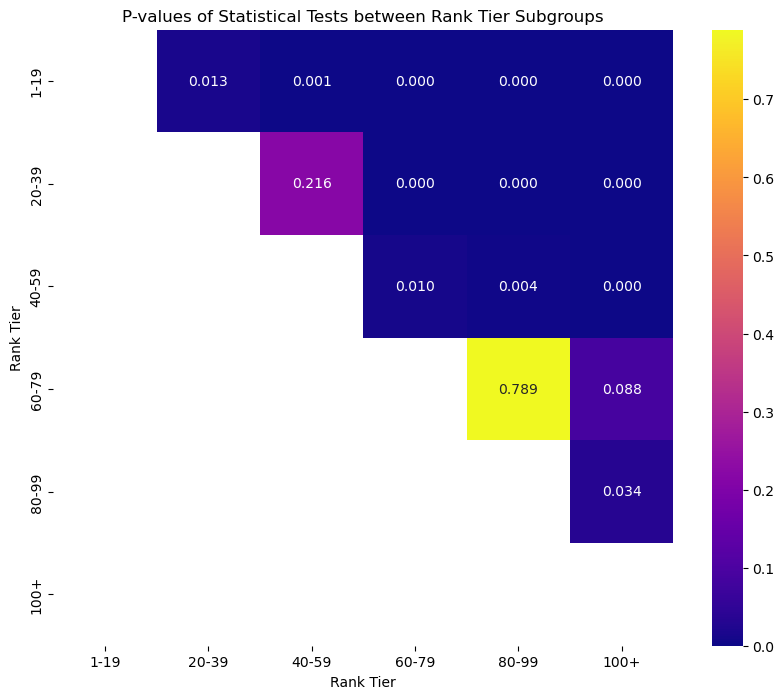

Significant pairs (p < 0.05):
Rank Tier 1-19 vs Rank Tier 20-39: p-value = 0.0131
Rank Tier 1-19 vs Rank Tier 40-59: p-value = 0.0009
Rank Tier 1-19 vs Rank Tier 60-79: p-value = 0.0000
Rank Tier 1-19 vs Rank Tier 80-99: p-value = 0.0000
Rank Tier 1-19 vs Rank Tier 100+: p-value = 0.0000
Rank Tier 20-39 vs Rank Tier 60-79: p-value = 0.0000
Rank Tier 20-39 vs Rank Tier 80-99: p-value = 0.0000
Rank Tier 20-39 vs Rank Tier 100+: p-value = 0.0000
Rank Tier 40-59 vs Rank Tier 60-79: p-value = 0.0097
Rank Tier 40-59 vs Rank Tier 80-99: p-value = 0.0045
Rank Tier 40-59 vs Rank Tier 100+: p-value = 0.0001
Rank Tier 80-99 vs Rank Tier 100+: p-value = 0.0335


In [18]:
import scipy.stats as stats

rank_tier_subgroups = df.groupby('Rank Tier')['Local Purchasing Power Index']

pairs = [(tier1, tier2) for i, (tier1, _) in enumerate(rank_tier_subgroups) for j, (tier2, _) in enumerate(rank_tier_subgroups) if i < j]

p_values = np.zeros((len(rank_tier_subgroups), len(rank_tier_subgroups)))

significant_pairs = []
rank_tier_labels = list(rank_tier_subgroups.groups.keys())

for i, (group1_name, group1) in enumerate(rank_tier_subgroups):
   for j, (group2_name, group2) in enumerate(rank_tier_subgroups):
      if i < j:
         norm1 = stats.shapiro(group1).pvalue >= 0.05
         norm2 = stats.shapiro(group2).pvalue >= 0.05

         if norm1 and norm2:
               _, p_value = stats.ttest_ind(group1, group2)
         else:
               _, p_value = stats.mannwhitneyu(group1, group2)

         p_values[i, j] = p_value

         if p_value < 0.05:
               significant_pairs.append((group1_name, group2_name, p_value))

p_values_df = pd.DataFrame(p_values, index=rank_tier_labels, columns=rank_tier_labels)

fig, axes = plt.subplots(figsize=(10, 8))
sns.heatmap(p_values_df, annot=True, fmt=".3f", cmap='plasma', cbar=True, mask=(p_values_df == 0.0), ax=axes)
axes.set_title('P-values of Statistical Tests between Rank Tier Subgroups')
axes.set_xlabel('Rank Tier')
axes.set_ylabel('Rank Tier')
plt.show()

print("Significant pairs (p < 0.05):")
for pair in significant_pairs:
   print(f"Rank Tier {pair[0]} vs Rank Tier {pair[1]}: p-value = {pair[2]:.4f}")   


#### Statistical significance of Rank Tier differences

Almost all ranking groups significantly differ from each other except:

- No evidence of difference between Rank 40-59 and 20-39.

- Rank 60-79 and 80-99 null hypothesis is rejected.

- All other dependencies can be confirmed as statistically different.